In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.neighbors import KDTree

# from metrics_scripts.metrics_utils import *

# import pandas as pd
# from osgeo import ogr, gdal, osr

# import cPickle as pickle

# import itertools

# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

# from shapely.geometry import shape, Point, Polygon, MultiLineString, MultiPoint, MultiPolygon, LineString

# from sklearn.decomposition import PCA

# import matplotlib.cm as cm

# import seaborn as sns

# from sklearn.cross_validation import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.cluster import KMeans

# # import fairml
# import clusterpy
# # from time import gmtime, strftime

# # import os
# from glob import glob
# # import re

import numpy as np
from glob import glob
import pandas as pd
from osgeo import ogr, gdal, osr
import cPickle as pickle
import itertools

from shapely.geometry import shape, Point, Polygon, MultiLineString, MultiPoint, MultiPolygon, LineString

import clusterpy

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KDTree
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

from metrics_scripts.metrics_utils import *

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.cm as cm

%matplotlib inline

/Users/mari/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Modified from http://www.ritchieng.com/machine-learning-project-customer-segments/

def pca_results_funct(good_data, pca, plot = False):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    if plot:
        
        # Create a bar plot visualization
        fig, ax = plt.subplots(figsize = (14,8))

        # Plot the feature weights as a function of the components
        components.plot(ax = ax, kind = 'bar');
        ax.set_ylabel("Feature Weights")
        ax.set_xticklabels(dimensions, rotation=0)


        # Display the explained variance ratios
        for i, ev in enumerate(pca.explained_variance_ratio_):
            ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

def cluster_results(reduced_data, preds, centers):
    '''
    Visualizes the PCA-reduced cluster data in two dimensions
    Adds cues for cluster centers and student-selected sample data
    '''

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)
    cols = reduced_data.columns.values

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('tab10')
    

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = cols[0], y = cols[1], \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=100, alpha = 0.2);

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);



    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");



In [6]:
islands, fields = load_shapefile('_output/islands_properties.shp', parameters='all')




fields = {k:np.array(v) for k,v in fields.iteritems()}
fields['r_perim'] = fields['p_wetperim'] / fields['p_perim']

fields['sin500'][fields['sin500'] > 1.15] = 1.15
fields['sin1000'][fields['sin1000'] > 1.2] = 1.2
fields['sin1500'][fields['sin1500'] > 1.3] = 1.3

In [7]:
classify_data_raw = pd.DataFrame()

loc = np.where(fields['p_area'] >= 0.02)[0]

# for k in fields.keys():

#     vals = (fields[k] - fields[k].min()) / (fields[k].max() - fields[k].min())
#     classify_data_raw[k.encode('utf-8')] = np.log10(vals)
#     print k, classify_data_raw[k].min()
    
#     if classify_data_raw[k].min() == np.inf:
#         print k
        
#         vals = np.log10(fields[k] + 0.1)
#         vals[vals == -1] = 0
        
#         classify_data_raw[k.encode('utf-8')] = vals


classify_data_raw = pd.DataFrame()


for k in fields.keys():

    classify_data_raw[k.encode('utf-8')] = np.log10(fields[k] /
                                     fields[k].min())
    
    if classify_data_raw[k].min() == np.inf:
        print k
        
        vals = np.log10(fields[k] + 0.1)
        vals[vals == -1] = 0
        
        classify_data_raw[k.encode('utf-8')] = vals
            
    
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(classify_data_raw.values)

for n,c in enumerate(classify_data_raw.columns):
    classify_data_raw[c] = scaled_data[:,n]

pd.to_pickle(classify_data_raw, '_output/classify_data_raw')

p_int_len
o_ang_std
o_ang_min
zone
o_ang_max
o_ang_med
p_num_ox
out_numbr
o_ang_mean


/Users/mari/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in divide
/Users/mari/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide


In [8]:

zones = classify_data_raw['zone']
classify_data_raw.drop('zone', axis = 1, inplace = True)
classify_data_raw.drop('p_int_len', axis = 1, inplace = True)
classify_data_raw.drop('p_orient', axis = 1, inplace = True)

classify_data_raw.drop('o_ang_std', axis = 1, inplace = True)
classify_data_raw.drop('o_ang_min', axis = 1, inplace = True)
classify_data_raw.drop('o_ang_mean', axis = 1, inplace = True)
classify_data_raw.drop('o_ang_med', axis = 1, inplace = True)
classify_data_raw.drop('o_ang_max', axis = 1, inplace = True)


column_dict = {'p_ch_area':'Convex hull Area',
              'p_eq_a_dia':'Equivalent-area Diameter',
              'min_width':'Min.Width', 
              'p_area':'Area',
              'p_asp_rat':'AspectR',
              'p_concav':'Concavity',
              'p_perim':'Dry Perimeter',
              'p_major_ax':'Major Axis',
              'out_numbr':'Num.Out',
              'edge_d2':'Max. Distance to Edge',
              'p_ch_perim':'Convex hull Perimeter',
              'p_solidity':'Solidity',
              'r_perim':'Wet/Dry',
              'p_d_shapef':'Dry Shape Factor',
              'p_convex':'Convexity',
              'p_wetperim':'Wet Perimeter',
              'p_num_ox':'Number of Oxbows',
              'p_p_eq_dia':'Perimeter-equiv. Diameter',
              'p_minor_ax':'Minor Axis',
              'p_w_shapef':'WetShapeF',
              'sin1500':'S (1500 m)',
              'p_circ':'Circular',
              'avg_width':'Avg.Width',
              'sin500':'S (500 m)', 
              'max_width': 'Max.Width',
              'sin1000':'S (1000 m)'}

classify_data_raw.columns = [column_dict[i] for i in list(classify_data_raw.columns.values)]


classify_data2 = classify_data_raw[['Area','Wet/Dry',
 'AspectR', 'WetShapeF',
 'Convexity', 'Circular','Solidity',
 'Num.Out',
 'Min.Width', 'Max.Width', 'Avg.Width', 
 'S (500 m)',  'S (1000 m)','S (1500 m)']]

In [106]:
pd.to_pickle(classify_data2, '_output/classify_data2')

In [3]:
classify_data2 = pd.read_pickle('_output/classify_data2')


In [107]:
# classify_data = pd.read_pickle('_output/classify_data2')

field_type = {}

for k in classify_data2.columns:
    field_type[k.encode('utf-8')] = ogr.OFTReal
    

create_shapefile_from_shapely_multi(islands,
                                    '_output/islands_properties_all.shp',
                                    fields = classify_data2,
                                    field_type = field_type)

In [9]:
column_dict = {'min_width':'Min.Width', 
              'p_area':'Area',
              'p_asp_rat':'AspectR',
              'out_numbr':'Num.Out',
              'p_solidity':'Solidity',
              'r_perim':'Wet/Dry',
              'p_convex':'Convexity',
              'p_w_shapef':'WetShapeF',
              'sin1500':'S (1500 m)',
              'p_circ':'Circular',
              'avg_width':'Avg.Width',
              'sin500':'S (500 m)', 
              'max_width': 'Max.Width',
              'sin1000':'S (1000 m)'}



fields_pd = pd.DataFrame()

for k in column_dict.keys():
    
    fields_pd[column_dict[k]] = fields[k]
    
    
fields_pd = fields_pd[['Area','AspectR', 'Wet/Dry', 'WetShapeF',
 'Circular','Convexity', 'Solidity',
 'Num.Out',
 'Min.Width', 'Max.Width', 'Avg.Width', 
 'S (500 m)',  'S (1000 m)','S (1500 m)']]

pd.to_pickle(fields_pd, '_output/fields_pd')

In [13]:
'''Principal component analysis (PCA) is a statistical procedure
that uses an orthogonal transformation to convert a set of
observations of possibly correlated variables into a set of
values of linearly uncorrelated variables called principal components
'''

output_dir = '_figs/'

pca = PCA(n_components=10)
pca.fit(classify_data2)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(classify_data2)



# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data)

pca_results = pca_results_funct(classify_data2, pca)
explained_variance = pca.explained_variance_ratio_
print 'Explained variance:', sum(explained_variance)*100, '%'

pd.to_pickle(explained_variance,'_output/pca_explained_variance.p')

Explained variance: 97.9040914385 %


In [11]:
pca_results_funct(classify_data2,pca,plot=True)

,Explained Variance,Area,Wet/Dry,AspectR,WetShapeF,Convexity,Circular,Solidity,Num.Out,Min.Width,Max.Width,Avg.Width,S (500 m),S (1000 m),S (1500 m)
Dimension 1,0.2873,-0.0064,0.0707,0.1036,0.0119,0.0688,0.0474,0.0826,0.0123,0.2126,0.5737,0.5169,-0.2727,-0.3674,-0.3454
Dimension 2,0.2786,0.4216,0.5495,-0.0976,0.3646,-0.1125,-0.1371,-0.1817,0.4290,-0.1033,0.2042,0.0780,0.0360,0.1714,0.2002
Dimension 3,0.1255,-0.0083,-0.3541,0.4270,0.0900,-0.2245,-0.5158,-0.2642,-0.2119,0.1014,0.2163,0.2082,0.0565,0.2529,0.2922
Dimension 4,0.1172,-0.0880,0.0855,0.3832,0.2353,-0.1025,-0.3533,-0.2072,0.1704,-0.1577,-0.2941,-0.2906,-0.1508,-0.4170,-0.4278
Dimension 5,0.0536,0.1739,-0.2599,-0.6791,-0.0295,-0.4339,-0.2010,-0.2387,-0.1764,-0.1656,0.0969,-0.0497,-0.1476,-0.2333,-0.0891
Dimension 6,0.0344,-0.0497,0.0483,-0.1519,0.0883,-0.3140,-0.1166,0.1439,0.1731,0.8400,-0.2975,0.0337,0.0671,-0.0069,-0.0418
Dimension 7,0.0264,-0.4265,0.0768,-0.1516,0.0757,-0.1002,-0.0652,-0.0978,0.0633,-0.1283,0.1697,0.1287,0.7069,0.1657,-0.4083
Dimension 8,0.0209,0.6834,-0.2467,0.0860,-0.1690,0.2871,0.0714,-0.2795,-0.0058,0.1868,-0.0679,-0.0148,0.3406,0.0063,-0.3387
Dimension 9,0.0196,-0.3584,-0.0231,-0.1883,-0.0459,0.4105,0.0625,-0.7158,0.2068,0.2052,-0.0188,0.0277,-0.1344,-0.0781,0.1962
Dimension 10,0.0156,-0.0439,-0.4585,0.0287,-0.2447,-0.1184,0.0037,0.1444,0.7649,-0.1038,0.1559,-0.0857,-0.1426,0.1944,-0.0815


In [12]:
plt.figure(figsize=(7,4))

data = pca_results[classify_data2.columns.values]

pd.to_pickle(data, '_output/pca_correlations.p')

ax = sns.heatmap(data,
            vmin=-1, vmax = 1,
            cmap = 'bwr_r',
            cbar_kws={'label': 'Variable weight', 'ticks': [-1,0,1]},
            xticklabels = classify_data2.columns.values)
ax.set_yticklabels(range(1,11),rotation = 0);
ax.set_ylabel('Dimension')

ax.axhline(y=0, color='k',linewidth=1)
ax.axhline(y=data.shape[0], color='k',linewidth=1)
ax.axvline(x=0, color='k',linewidth=1)
ax.axvline(x=data.shape[1], color='k',linewidth=1)


vlines = [4, 7, 11]

for x in vlines:
    ax.axvline(x=x, color='k',linewidth=0.5, ls = ':')


plt.subplots_adjust(left = 0.08, right = 1.05, top = 0.95, bottom = 0.5)

plt.savefig(output_dir + 'variable_weight_all.png', dpi = 300, )    

In [112]:
plt.figure(figsize=(5, 3))

plt.grid(zorder=1, alpha = 0.25)
plt.bar(range(len(explained_variance)),explained_variance*100, zorder=2)
plt.plot(range(len(explained_variance)),explained_variance*100, 'ko-', zorder=3)
plt.xlabel('Dimension')
plt.ylabel('Percentage of explained variances')
plt.ylim(0,np.ceil(np.max(explained_variance*10))*10)
plt.xticks(range(0,10), range(1,11))

labels = ['{:.1%}'.format(i) for i in explained_variance]
labels = [i if i[0]<>'0' else i[1:] for i in labels]


for label, x, y in zip(labels, range(len(explained_variance)), explained_variance*100):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-2,8),
        textcoords='offset points', ha='left', va='center', size=10)
    
plt.savefig(output_dir + 'scree_plot_all.png', dpi = 300)    
plt.close()

In [113]:
reduced_data.columns = ['PCA' + str(k) for k in reduced_data.columns.values if type(k) <> 'str']


In [114]:

field_type = {}

for k in reduced_data.columns:
    field_type[k] = ogr.OFTReal
    

create_shapefile_from_shapely_multi(islands,
                                    '_output/islands_properties_pca10_all.shp',
                                    fields = reduced_data,
                                    field_type = field_type)

pd.to_pickle(reduced_data, '_output/reduced_data_all.p')

In [115]:
clusterpy_output_dir = '_clusterpy/'

def predict_geosom(data):
    
    for k in c_data.Y.keys():
        c_data.Y[k] = [k] + list(data[k,:])

    c_data.cluster("geoSom", params, nRows=nRows, nCols=nCols, wType="queen", iters = 1000)
    c_data.exportArcData(clusterpy_output_dir + '/classes_' + directory)
    c_data.exportOutputs(clusterpy_output_dir + '/output_' + directory + ".csv")

    c_data.outputCluster = {'r2a': [], 'r2aRoot': []}
    
    
    return np.array(c_data.region2areas)

In [116]:

filename = '_output/islands_properties_pca10_all'
c_data = clusterpy.importArcData(filename)

params = reduced_data.columns.tolist()

for n in [4,5,6,7,8]:
    
    directory = str(n) + 'x' + str(n)
    
    output_dir = '_clusterpy/geoSom/' + directory

    nRows = n
    nCols = n
    regions = predict_geosom(reduced_data.values)
    


In [18]:
regions_all = pd.DataFrame()
preds_full = pd.DataFrame()

for n in [4,5,6,7,8]:
    
    directory = str(n) + 'x' + str(n)

    files_col = '_clusterpy/' + directory + '/output_' + directory + '.csv'
    
    lines = open(files_col, "r").read().split(';')
    regions = [int(i) for i in lines[18][1:-1].split(',')]
    
    regions_all[str(n)] = regions
    
    
    clustered_data = pd.DataFrame(columns=reduced_data.columns)

    for i in np.unique(regions):
        clustered_data.loc[i] = reduced_data.loc[regions == i].mean().values
        
        
    
    Ks = range(5,np.min([26,max(regions)+1]),1)
        
    for K in Ks:
        
        clusterer = KMeans(n_clusters=K).fit(clustered_data)
        preds = clusterer.predict(clustered_data)
        
        preds_stash = np.zeros_like(regions)

        for nn,i in enumerate(np.unique(regions)):
            preds_stash[regions == i] = preds[nn]
            
            
        preds_full[str(n) + '_' + str(K)] = preds_stash

In [118]:
field_type = {}

for k in preds_full.columns:
    field_type[k] = ogr.OFTReal
    

create_shapefile_from_shapely_multi(islands,
                                    '_clusterpy/kmeans_all.shp',
                                    fields = preds_full,
                                    field_type = field_type)

In [119]:
field_type = {}

for k in regions_all.columns:
    field_type[k] = ogr.OFTReal
    

create_shapefile_from_shapely_multi(islands,
                                    '_clusterpy/regions_all.shp',
                                    fields = regions_all,
                                    field_type = field_type)

In [19]:
# kmeans only -  no geosom (for demonstration)


preds_kmeans_only = pd.DataFrame()

Ks = range(4,26,1)
        
for K in Ks:

    clusterer = KMeans(n_clusters=K).fit(reduced_data)
    preds = clusterer.predict(reduced_data)

    preds_kmeans_only[str(K) + '_'] = list(preds)
        
        

In [20]:
data = pd.DataFrame()

for col in classify_data2.columns:
    
    p1,p99 = np.percentile(classify_data2[col],[1,99])
    data[col] = (classify_data2[col] - p1) / (p99 - p1)
    
data['class'] = preds_full['8_25']



cmap = plt.cm.RdGy_r
norm = mpl.colors.Normalize(vmin=0, vmax=1)

# class_range = [3,11,14,0,4,13,7,9,12,6,16,15,1,18,2,8,5,10,17,]

class_range = np.unique(data['class'])
class_range = [15,4,12,14, 6,7,22,10,20,16,23,1,8,24,2,0,3,21,5,9,11,13,17,18,19]

sort = np.argsort(class_range)
line_range = np.arange(-0.5, data['class'].max() + 1, 0.5)

fig, axes = plt.subplots(nrows=14, ncols=1, figsize=(20, 20))

vals_all = []
for nn,col in enumerate(classify_data2.columns.values):

    vals = [list(data.loc[data['class'] == i, col]) for i in class_range]
    vals_med = [np.median(i) for i in vals]
    
    vals_all.append(vals_med)

    parts = axes[nn].violinplot(vals, np.unique(data['class']), points=20, widths=0.7,
                          showmeans=False, showextrema=True, showmedians=True,);

    for n,pc in enumerate(parts['bodies']):
        pc.set_facecolor(cmap(norm(vals_med[n])))
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        pc.set_linewidth(1)

    for c in parts.keys():
        if c != 'bodies':
            vp = parts[c]
            vp.set_edgecolor('black')
            vp.set_linewidth(1)
    
#     axes[nn].plot(line_range, np.ones_like(line_range) * 0.5, 'k--', lw = 1, zorder = 1)
    axes[nn].set_xlim(-0.5,data['class'].max() + 0.5)
    axes[nn].set_ylim(-0.1,1.1)
    axes[nn].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    axes[nn].set_xticks(np.unique(data['class']))
    axes[nn].grid(color='0.5', linestyle='--', linewidth=1)
#     axes[nn].axis(False);

    h = axes[nn].set_ylabel(col)
    h.set_rotation(45)

axes[nn].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
axes[nn].set_xticks(np.unique(data['class']))
axes[nn].set_xticklabels(class_range);

axes[0].set_title('GeoSOM 8x8, Kmeans K = 25')

plt.savefig('_figs/violin_8x8_k25.png')



In [21]:
data = pd.DataFrame()

for col in classify_data2.columns:
    
    p1,p99 = np.percentile(classify_data2[col],[1,99])
    data[col] = (classify_data2[col] - p1) / (p99 - p1)
    
data['class'] = preds_full['6_17']



cmap = plt.cm.RdGy_r
norm = mpl.colors.Normalize(vmin=0, vmax=1)

# class_range = [3,11,14,0,4,13,7,9,12,6,16,15,1,18,2,8,5,10,17,]

class_range = np.unique(data['class'])
# class_range = [15,4,12,14, 6,7,22,10,20,16,23,1,8,24,2,0,3,21,5,9,11,13,17,18,19]

sort = np.argsort(class_range)
line_range = np.arange(-0.5, data['class'].max() + 1, 0.5)

fig, axes = plt.subplots(nrows=14, ncols=1, figsize=(20, 20))

vals_all = []
for nn,col in enumerate(classify_data2.columns.values):

    vals = [list(data.loc[data['class'] == i, col]) for i in class_range]
    vals_med = [np.median(i) for i in vals]
    
    vals_all.append(vals_med)

    parts = axes[nn].violinplot(vals, np.unique(data['class']), points=20, widths=0.7,
                          showmeans=False, showextrema=True, showmedians=True,);

    for n,pc in enumerate(parts['bodies']):
        pc.set_facecolor(cmap(norm(vals_med[n])))
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        pc.set_linewidth(1)

    for c in parts.keys():
        if c != 'bodies':
            vp = parts[c]
            vp.set_edgecolor('black')
            vp.set_linewidth(1)
    
#     axes[nn].plot(line_range, np.ones_like(line_range) * 0.5, 'k--', lw = 1, zorder = 1)
    axes[nn].set_xlim(-0.5,data['class'].max() + 0.5)
    axes[nn].set_ylim(-0.1,1.1)
    axes[nn].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    axes[nn].set_xticks(np.unique(data['class']))
    axes[nn].grid(color='0.5', linestyle='--', linewidth=1)
#     axes[nn].axis(False);

    h = axes[nn].set_ylabel(col)
    h.set_rotation(45)

axes[nn].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
axes[nn].set_xticks(np.unique(data['class']))
axes[nn].set_xticklabels(class_range);

axes[0].set_title('GeoSOM 6x6, Kmeans K = 17')

plt.savefig('_figs/violin_6x6_k17.png')



In [22]:
'''
Compare the parameter spread between clusters and their internal spread
'''



# metric
# find the combination of clustering algorithms that minimizes the standard deviation within each class,
# maximizes the euclidean distance between different classes, and minimizes the geographic spread of the class


internal_std_all_pca = pd.DataFrame(columns=preds_full.columns)
external_dist_all_pca = pd.DataFrame(columns=preds_full.columns)

for algorithm in preds_full.columns.values:

    classes = np.unique(preds_full[algorithm])
    internal_std = pd.DataFrame(columns=reduced_data.columns)

    for i in classes:

        for param in reduced_data.columns.values:

            vals = reduced_data.loc[preds_full[algorithm] == i, param]
            internal_std.loc[i,param] = np.std(vals)

    internal_std_all_pca.loc[0,algorithm] = np.mean(internal_std.values)

    external_dist = []

    for it1, it2 in itertools.combinations(classes, 2):

        dist = []

        for param in reduced_data.columns.values:
            dist.append(np.sqrt((np.mean(reduced_data.loc[preds_full[algorithm] == it1,param]) -
                                 np.mean(reduced_data.loc[preds_full[algorithm] == it2,param]))**2))

        external_dist.append(np.mean(dist))

    external_dist_all_pca.loc[0,algorithm] = np.mean(external_dist)

for algorithm in preds_kmeans_only.columns.values:

    classes = np.unique(preds_kmeans_only[algorithm])
    internal_std = pd.DataFrame(columns=reduced_data.columns)

    for i in classes:

        for param in reduced_data.columns.values:

            vals = reduced_data.loc[preds_kmeans_only[algorithm] == i, param]
            internal_std.loc[i,param] = np.std(vals)

    internal_std_all_pca.loc[0,algorithm] = np.mean(internal_std.values)

    external_dist = []

    for it1, it2 in itertools.combinations(classes, 2):

        dist = []

        for param in reduced_data.columns.values:
            dist.append(np.sqrt((np.mean(reduced_data.loc[preds_kmeans_only[algorithm] == it1,param]) -
                                 np.mean(reduced_data.loc[preds_kmeans_only[algorithm] == it2,param]))**2))

        external_dist.append(np.mean(dist))

    external_dist_all_pca.loc[0,algorithm] = np.mean(external_dist)
    
    
for algorithm in regions_all.columns.values:

    classes = np.unique(regions_all[algorithm])
    internal_std = pd.DataFrame(columns=reduced_data.columns)

    for i in classes:

        for param in reduced_data.columns.values:

            vals = reduced_data.loc[regions_all[algorithm] == i, param]
            internal_std.loc[i,param] = np.std(vals)

    internal_std_all_pca.loc[0,algorithm] = np.mean(internal_std.values)

    external_dist = []

    for it1, it2 in itertools.combinations(classes, 2):

        dist = []

        for param in reduced_data.columns.values:
            dist.append(np.sqrt((np.mean(reduced_data.loc[regions_all[algorithm] == it1,param]) -
                                 np.mean(reduced_data.loc[regions_all[algorithm] == it2,param]))**2))

        external_dist.append(np.mean(dist))

    external_dist_all_pca.loc[0,algorithm] = np.mean(external_dist)

pd.to_pickle(external_dist_all_pca, '_clusterpy/external_euclidean_distances_pca.p')
pd.to_pickle(internal_std_all_pca, '_clusterpy/internal_std_pca.p')

# metric
# find the combination of clustering algorithms that minimizes the standard deviation within each class,
# maximizes the euclidean distance between different classes, and minimizes the geographic spread of the class


internal_std_all = pd.DataFrame(columns=preds_full.columns)
external_dist_all = pd.DataFrame(columns=preds_full.columns)

for algorithm in preds_full.columns.values:

    classes = np.unique(preds_full[algorithm])
    internal_std = pd.DataFrame(columns=classify_data2.columns)

    for i in classes:

        for param in classify_data2.columns.values:

            vals = classify_data2.loc[preds_full[algorithm] == i, param]
            internal_std.loc[i,param] = np.std(vals)

    internal_std_all.loc[0,algorithm] = np.mean(internal_std.values)

    external_dist = []

    for it1, it2 in itertools.combinations(classes, 2):

        dist = []

        for param in classify_data2.columns.values:
            dist.append(np.sqrt((np.mean(classify_data2.loc[preds_full[algorithm] == it1,param]) -
                                 np.mean(classify_data2.loc[preds_full[algorithm] == it2,param]))**2))

        external_dist.append(np.mean(dist))

    external_dist_all.loc[0,algorithm] = np.mean(external_dist)

for algorithm in preds_kmeans_only.columns.values:

    classes = np.unique(preds_kmeans_only[algorithm])
    internal_std = pd.DataFrame(columns=classify_data2.columns)

    for i in classes:

        for param in classify_data2.columns.values:

            vals = classify_data2.loc[preds_kmeans_only[algorithm] == i, param]
            internal_std.loc[i,param] = np.std(vals)

    internal_std_all.loc[0,algorithm] = np.mean(internal_std.values)

    external_dist = []

    for it1, it2 in itertools.combinations(classes, 2):

        dist = []

        for param in classify_data2.columns.values:
            dist.append(np.sqrt((np.mean(classify_data2.loc[preds_kmeans_only[algorithm] == it1,param]) -
                                 np.mean(classify_data2.loc[preds_kmeans_only[algorithm] == it2,param]))**2))

        external_dist.append(np.mean(dist))

    external_dist_all.loc[0,algorithm] = np.mean(external_dist)
    
    
for algorithm in regions_all.columns.values:

    classes = np.unique(regions_all[algorithm])
    internal_std = pd.DataFrame(columns=classify_data2.columns)

    for i in classes:

        for param in classify_data2.columns.values:

            vals = classify_data2.loc[regions_all[algorithm] == i, param]
            internal_std.loc[i,param] = np.std(vals)

    internal_std_all.loc[0,algorithm] = np.mean(internal_std.values)

    external_dist = []

    for it1, it2 in itertools.combinations(classes, 2):

        dist = []

        for param in classify_data2.columns.values:
            dist.append(np.sqrt((np.mean(classify_data2.loc[regions_all[algorithm] == it1,param]) -
                                 np.mean(classify_data2.loc[regions_all[algorithm] == it2,param]))**2))

        external_dist.append(np.mean(dist))

    external_dist_all.loc[0,algorithm] = np.mean(external_dist)

pd.to_pickle(external_dist_all, '_clusterpy/external_euclidean_distances.p')
pd.to_pickle(internal_std_all, '_clusterpy/internal_std.p')

# calculating just the geographic distance doesn't work because algorithms with fewer classes might have larger groups


internal_geo_all = pd.DataFrame(columns=preds_full.columns, dtype = 'float')

for algorithm in preds_full.columns.values:

    classes = np.unique(preds_full[algorithm])
    stds = []

    for i in classes:

        loc = np.where(preds_full[algorithm] == i)[0]
        coords = np.zeros((len(loc),2))

        for n,l in enumerate(loc):

            coords[n,:] = islands[l].centroid.coords[0]
            
        stds.append(np.std(coords))
        
    internal_geo_all.loc[0,algorithm] = np.float(np.mean(stds))

for algorithm in preds_kmeans_only.columns.values:

    classes = np.unique(preds_kmeans_only[algorithm])
    stds = []

    for i in classes:

        loc = np.where(preds_kmeans_only[algorithm] == i)[0]
        coords = np.zeros((len(loc),2))

        for n,l in enumerate(loc):

            coords[n,:] = islands[l].centroid.coords[0]
            
        stds.append(np.std(coords))
        
    internal_geo_all.loc[0,algorithm] = np.float(np.mean(stds))
    
    
for algorithm in regions_all.columns.values:

    classes = np.unique(regions_all[algorithm])
    stds = []

    for i in classes:

        loc = np.where(regions_all[algorithm] == i)[0]
        coords = np.zeros((len(loc),2))

        for n,l in enumerate(loc):

            coords[n,:] = islands[l].centroid.coords[0]
            
        stds.append(np.std(coords))
        
    internal_geo_all.loc[0,algorithm] = np.float(np.mean(stds))

pd.to_pickle(internal_geo_all, '_clusterpy/internal_geo_spread.p')

# calculating just the geographic distance doesn't work because algorithms with fewer classes might have larger groups


internal_geo_dist_all = pd.DataFrame(columns=preds_full.columns, dtype = 'float')

for algorithm in preds_full.columns.values:

    classes = np.unique(preds_full[algorithm])
    centroids = []

    for i in classes:

        loc = np.where(preds_full[algorithm] == i)[0]
        coords = np.zeros((len(loc),2))

        for n,l in enumerate(loc):

            coords[n,:] = islands[l].centroid.coords[0]
            
        centroids.append(list(np.mean(coords,axis=0)))
    
    centroids = np.array(centroids)
    
    dist = []
    
    for it1, it2 in itertools.combinations(classes, 2):

        dist.append(np.sqrt((centroids[it1,0] - centroids[it2,0])**2 + (centroids[it1,1] - centroids[it2,1])**2))
            
            
    internal_geo_dist_all.loc[0,algorithm] = np.mean(dist)

for algorithm in preds_kmeans_only.columns.values:

    classes = np.unique(preds_kmeans_only[algorithm])
    centroids = []

    for i in classes:

        loc = np.where(preds_kmeans_only[algorithm] == i)[0]
        coords = np.zeros((len(loc),2))

        for n,l in enumerate(loc):

            coords[n,:] = islands[l].centroid.coords[0]
            
        centroids.append(list(np.mean(coords,axis=0)))
    
    centroids = np.array(centroids)
    
    dist = []
    
    for it1, it2 in itertools.combinations(classes, 2):

        dist.append(np.sqrt((centroids[it1,0] - centroids[it2,0])**2 + (centroids[it1,1] - centroids[it2,1])**2))
            
            
    internal_geo_dist_all.loc[0,algorithm] = np.mean(dist)
    
    
for algorithm in regions_all.columns.values:

    classes = np.unique(regions_all[algorithm])
    centroids = []

    for i in classes:

        loc = np.where(regions_all[algorithm] == i)[0]
        coords = np.zeros((len(loc),2))

        for n,l in enumerate(loc):

            coords[n,:] = islands[l].centroid.coords[0]
            
        centroids.append(list(np.mean(coords,axis=0)))
    
    centroids = np.array(centroids)
    
    dist = []
    
    for it1, it2 in itertools.combinations(classes, 2):

        dist.append(np.sqrt((centroids[it1,0] - centroids[it2,0])**2 + (centroids[it1,1] - centroids[it2,1])**2))
            
            
    internal_geo_dist_all.loc[0,algorithm] = np.mean(dist)

pd.to_pickle(internal_geo_dist_all, '_clusterpy/internal_geo_dist_spread.p')

KeyboardInterrupt: 

In [23]:
external_dist_all_pca = pd.read_pickle('_clusterpy/external_euclidean_distances_pca.p')
internal_std_all_pca = pd.read_pickle('_clusterpy/internal_std_pca.p')

external_dist_all = pd.read_pickle('_clusterpy/external_euclidean_distances.p')
internal_std_all = pd.read_pickle('_clusterpy/internal_std.p')

internal_geo_all = pd.read_pickle('_clusterpy/internal_geo_spread.p')

internal_geo_dist_all = pd.read_pickle('_clusterpy/internal_geo_dist_spread.p')

In [24]:
eu_dist = external_dist_all.values[0].astype('float')
eu_dist = (eu_dist - eu_dist.min()) / (eu_dist.max() - eu_dist.min())

std = internal_std_all.values[0].astype('float')
std = (std - std.min()) / (std.max() - std.min())

geo_dist = internal_geo_dist_all.values[0]
geo_dist = (geo_dist - geo_dist.min()) / (geo_dist.max() - geo_dist.min())

optimized = eu_dist - std + geo_dist
ind = np.argsort(optimized)[::-1]
scores = list(optimized[ind])
ordered_by_score = list(external_dist_all.columns.values[ind])

scored = [i for i in ordered_by_score if (('_' in i) and (i[-1] != '_'))]


geosom_number = [int(i[0]) if i[-1] is not '_' else 0 for i in external_dist_all.columns.values]
kmeans_number = [int(i[2:]) if (i[-1] is not '_') & (len(i) > 1) else (0 if len(i)==1 else int(i[:-1])) for i in external_dist_all.columns.values]

plt.figure(figsize=(7,5))

color = ['k' if i == 0 else (
        'b' if i == 4 else (
        'g' if i == 5 else (
        'gold' if i == 6 else (
        'orange' if i == 7 else (
        'r' if i == 8 else None))))) for i in geosom_number]

color = ['k' if i == 0 else (
        'darkcyan' if i == 4 else (
        'violet' if i == 5 else (
        'darkviolet' if i == 6 else (
        'dodgerblue' if i == 7 else (
        'firebrick' if i == 8 else None))))) for i in geosom_number]

a = internal_geo_dist_all.values[0]
sizes = ((a - a.min())/ (a.max() - a.min()) * 300) + 50

loc = (np.array(geosom_number) > 0) & (np.array(kmeans_number) > 0)

plt.scatter(external_dist_all.values[0][loc], internal_std_all.values[0][loc],
            c = np.array(color)[loc], s = sizes[loc], alpha = 1, marker = '.', edgecolor = 'w')
plt.xlabel('Euclidean distance (parameters) between clusters')
plt.ylabel('Standard deviation (parameters) within clusters')
plt.xlim(0.105,0.162)
plt.ylim(0.075,0.125)

for n in range(len(kmeans_number)):
    
    if geosom_number[n] == 0:
        plt.plot(external_dist_all.values[0][n], internal_std_all.values[0][n], 'x', c = color[n], ms = sizes[n] / 10, markeredgewidth = 2)
        
    if kmeans_number[n] == 0:
        plt.plot(external_dist_all.values[0][n], internal_std_all.values[0][n], '^', c = color[n], ms = sizes[n] / 20, alpha = 1, markeredgecolor = 'w')
        
        
    
plt.plot(0,0, '.', ms = 10, c = 'darkcyan', label = '4x4')
plt.plot(0,0, '.', ms = 10, c = 'violet', label = '5x5')
plt.plot(0,0, '.', ms = 10, c = 'darkviolet', label = '6x6')
plt.plot(0,0, '.', ms = 10, c = 'dodgerblue', label = '7x7')
plt.plot(0,0, '.', ms = 10, c = 'firebrick', label = '8x8')
plt.plot(0,0, '^', ms = 8, c = 'w', markeredgecolor = 'k', label = 'Only GeoSOM')
plt.plot(0,0, 'x', ms = 8, c = 'k', markeredgewidth = 2, label = 'No GeoSOM')

plt.legend()
plt.savefig('_figs/spread.png')

In [25]:
# Modified from https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.path import Path
from matplotlib.patches import PathPatch

def predict(X):
    
    gmm = GMM(n_components = K, max_iter = 100, n_init = 3, random_state=0).fit(X)
    labels = gmm.predict(X)


    probs = gmm.predict_proba(X)
    
    max_prob = np.zeros((probs.shape[0],))

    for r in range(probs.shape[0]):
        max_prob[r] = np.where(probs[r,:] == probs[r,:].max())[0]
        
    return probs, max_prob


all_fields = pd.DataFrame()

n_components = np.arange(1, 26)
ls = [0,0.05,0.1,0.5,1,5,10,50]
bic = np.zeros((len(ls),len(n_components)))

plot_flag = False

for g in range(6,9): # GeoSOM number
    
    regions = regions_all[str(g)].values
    bic_flag = False
    bic[:] = 0
    
    for K in range(16,31,2): # Number of GMM classes
        
        title_string = str(g) + 'x' + str(g) + ', K = ' + str(K)
        print 'GeoSOM ' + title_string


        

        fields = pd.DataFrame()
        clustered_data = pd.DataFrame(columns=reduced_data.columns.tolist())

        for col in reduced_data.columns:
            clustered_data[col] = reduced_data[col]


        # The islands take the mean values of the parameters of the islands in their geosom class
        # The pre-existing geographic grouping is therefore more important than the variability in the parameters within each
        # geosom class

        for i in np.unique(regions):
            ind = regions == i
            clustered_data.loc[ind,reduced_data.columns] = reduced_data.loc[regions == i].mean().values

        probs, max_prob = predict(clustered_data.values)

        n = 'x0'
        fields['mc_' + str(n)] = max_prob
        fields['mp_' + str(n)] = probs.max(axis=1)  
        
        
        all_fields[str(g) + '_' + str(K) + '_' + str(n)] = max_prob

        
        

        if plot_flag and bic_flag:
            models = [GMM(nc, random_state=0).fit(clustered_data.values) for nc in n_components]
            bic[0,:] = [m.bic(clustered_data.values) for m in models]


            
            

        # The islands keep their original parameters as well as a dummy variable that groups it by its geosom class
        # As the value of the dummy variable increases, the weight given to the geosom classification increases

        clustered_data = pd.DataFrame(columns=reduced_data.columns.tolist() + [str(i) for i in np.unique(regions)])

        for col in reduced_data.columns:
            clustered_data[col] = reduced_data[col]



        for n,l in enumerate(ls):

            for i in np.unique(regions):
                ind = regions == i
                clustered_data.loc[:,str(i)] = ind * l

            probs, max_prob = predict(clustered_data.values)

            fields['mc_' + str(n)] = max_prob
            fields['mp_' + str(n)] = probs.max(axis=1)
            
            all_fields[str(g) + '_' + str(K) + '_' + str(n)] = max_prob

            if plot_flag and bic_flag:
                models = [GMM(nc, random_state=0).fit(clustered_data.values) for nc in n_components]
                bic[n+1,:] = [m.bic(clustered_data.values) for m in models]



        if plot_flag:

            '''
            The fact that GMM is a generative model gives us a natural means of determining 
            the optimal number of components for a given dataset. A generative model is 
            inherently a probability distribution for the dataset, and so we can simply 
            evaluate the likelihood of the data under the model, using cross-validation to 
            avoid over-fitting. Another means of correcting for over-fitting is to adjust 
            the model likelihoods using some analytic criterion such as the Akaike information 
            criterion (AIC) or the Bayesian information criterion (BIC). 
            '''

            if bic_flag:
                plt.figure(figsize=(10,5))
                cNorm  = colors.Normalize(vmin=0, vmax=len(ls)-1);
                scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=plt.get_cmap('tab20b_r'))

                n = 'X'
                plt.plot(n_components, bic[0], 'k--', label=str(n))
                ind = np.where(np.array(bic[0]) == min(bic[0]))[0][0]
                plt.plot(n_components[ind], bic[0][ind], 'k*', ms = 10)

                for n,l in enumerate(ls):
                    colorVal = scalarMap.to_rgba(n)

                    plt.plot(n_components, bic[n+1], label=str(l), c = colorVal)
                    ind = np.where(np.array(bic[n+1]) == min(bic[n+1]))[0][0]
                    plt.plot(n_components[ind], bic[n+1][ind], '*', c = colorVal, ms = 10)

                plt.legend(bbox_to_anchor=(1,1))

                plt.xticks(n_components);
                plt.xlabel('Number of GMM classes')
                plt.ylabel('Bayesian information criterion (BIC)')
                # plt.grid()
                plt.xlim(0,26)
                plt.title('GeoSOM ' + title_string)

                plt.savefig('_clusterpy/BIC_' + title_string[:3] + '.png')
                plt.close()

                bic_flag = False






            # How similar are GMM classifications as the importance of the GeoSOM classes changes?
            # The higher the value of l (from the array ls), the more distance there is between 
            # islands in different GeoSOM classes, therefore giving greater importance to the
            # GeoSOM results during the GMM classification

            ls2 = range(len(ls)) + ['x0']

            similarity = np.ones((len(ls2),len(ls2)))

            for i,j in itertools.permutations(range(len(ls2)),2):

                vals = pd.crosstab(fields['mc_' + str(ls2[i])], fields['mc_' + str(ls2[j])]).values.astype('float')

                similarity[i,j] = (vals / vals.sum(axis=1)[:,np.newaxis]).max(axis=1).mean()


            minx = -0.5
            maxx = len(ls2) - 0.5
            miny = -0.5
            maxy = len(ls2) - 0.5

            # vertical, right
            path = Path([[maxx-1, miny],
                         [maxx, miny],
                         [maxx, maxy],
                         [maxx-1, maxy],
                         [maxx-1, miny]])
            patch0 = PathPatch(path, facecolor='none')

            # horizontal, bottom
            path = Path([[minx, maxy-1],
                         [maxx, maxy-1],
                         [maxx, maxy],
                         [minx, maxy],
                         [minx, maxy-1]])
            patch1 = PathPatch(path, facecolor='none')

            # vertical, left
            path = Path([[minx, miny],
                         [minx+1, miny],
                         [minx+1, maxy],
                         [minx, maxy],
                         [minx, miny]])
            patch2 = PathPatch(path, facecolor='none')

            # horizontal, top
            path = Path([[minx, miny],
                         [maxx, miny],
                         [maxx, miny+1],
                         [minx, miny+1],
                         [minx, miny]])
            patch3 = PathPatch(path, facecolor='none')


            fig, ax = plt.subplots(figsize=(10,5))


            im = ax.imshow(similarity, vmin = 0, vmax = 1, cmap = 'bone')
            fig.colorbar(im)
            ax.add_patch(patch0)
            ax.add_patch(patch1)
            ax.add_patch(patch2)
            ax.add_patch(patch3)

            ax.set_xlabel('Influence of geographic grouping')
            ax.set_ylabel('Influence of geographic grouping')

            ax.set_xticks(range(len(ls2)));
            ax.set_xticklabels(ls + ['X'], rotation = 90);
            ax.set_yticks(range(len(ls2)));
            ax.set_yticklabels(ls + ['X']);


            ax.set_title('Similarity between GMM classifications with different GeoSOM influence\nGeosom ' + title_string)
            plt.savefig('_clusterpy/similarity_' + title_string + '.png')
            plt.close()





            # Are the original geosom classes preserved or are they split up?
            # The longer (to lower distance l) a geosom class is preserved,
            # the more the geographic grouping is reflected in the parameters 

            similarity_to_geosom = np.ones((len(ls2),len(np.unique(regions))+1))

            for i in range(len(ls2)):

                vals = pd.crosstab(regions, fields['mc_' + str(ls2[i])]).values.astype('float')

                similarity_to_geosom[i,:-1] = (vals / vals.sum(axis=1)[:,np.newaxis]).max(axis=1)

            similarity_to_geosom[:,-1] = similarity_to_geosom.mean(axis=1)

            fig, ax = plt.subplots(figsize=(15,5))

            minx = -0.5
            maxx = len(np.unique(regions))+0.5
            miny = -0.45
            maxy = len(ls) + 0.5

            path = Path([[minx,maxy-1],
                         [maxx,maxy-1],
                         [maxx,maxy],
                         [minx,maxy],
                         [minx,maxy-1]])
            patch0 = PathPatch(path, facecolor='none')

            path = Path([[maxx-1,miny],
                         [maxx,miny],
                         [maxx,maxy],
                         [maxx-1,maxy],
                         [maxx-1,miny]])

            patch1 = PathPatch(path, facecolor='none', linewidth = 2)

            im = ax.imshow(similarity_to_geosom, vmin = 0, vmax = 1, cmap = 'bone')
            ax.add_patch(patch0)
            ax.add_patch(patch1)
            fig.colorbar(im)

            ax.set_xlabel('GeoSOM classes')
            ax.set_ylabel('Influence of geographic grouping')

            ax.set_xticks([])
            ax.set_yticks(range(len(ls2)));
            ax.set_yticklabels(ls + ['X']);

            ax.set_title('Preservation of original GeoSOM classes in GMM classification\nGeoSOM ' + title_string);plt.savefig('../pubs/GMM/preservation_' + title_string + '.png')
            plt.close()


            # what's the maximum probability of an island belonging to its assigned class?

            plt.figure(figsize=(10,5))
            vals, bins = np.histogram(fields['mp_' + str('x0')], bins = np.arange(0,1.05,0.05));
            plt.plot(bins[1:] - 0.025, [np.log10(i) / np.log10(float(len(regions))) if i > 0 else 0 for i in vals],
                     'k--', label=str('X'))

            for n,l in enumerate(ls):
                colorVal = scalarMap.to_rgba(n)

                vals, bins = np.histogram(fields['mp_' + str(ls2[n])], bins = np.arange(0,1.05,0.05));
                plt.plot(bins[1:] - 0.025, [np.log10(i) / np.log10(float(len(regions))) if i > 0 else 0 for i in vals],
                        c = colorVal, label=str(l))


            plt.ylabel('Fraction of islands')
            plt.xlabel('Probability')
            plt.title('Maximum probability of membership to a GMM class\nGeoSOM ' + title_string);
            plt.xlim(0,1)
            plt.ylim(0,1)
            plt.xticks(np.arange(0,1.01,0.2), np.arange(0,1.01,0.2));

            plt.legend(bbox_to_anchor=(1,1))
            plt.savefig('../pubs/GMM/membership_' + title_string + '.png')
            plt.close()


#             save shapefile

            field_type = {}
            for k in fields.columns:
                field_type[k] = ogr.OFTReal

            create_shapefile_from_shapely_multi(islands,
                                                '_clusterpy/gmm_' + str(g) + '_' + str(K) + '.shp',
                                                fields = fields,
                                                field_type = field_type)

        
        
        

pd.to_pickle(all_fields, '_clusterpy/all_fields.p')

GeoSOM 6x6, K = 16
GeoSOM 6x6, K = 18
GeoSOM 6x6, K = 20
GeoSOM 6x6, K = 22
GeoSOM 6x6, K = 24
GeoSOM 6x6, K = 26
GeoSOM 6x6, K = 28
GeoSOM 6x6, K = 30
GeoSOM 7x7, K = 16
GeoSOM 7x7, K = 18
GeoSOM 7x7, K = 20
GeoSOM 7x7, K = 22
GeoSOM 7x7, K = 24
GeoSOM 7x7, K = 26
GeoSOM 7x7, K = 28
GeoSOM 7x7, K = 30
GeoSOM 8x8, K = 16
GeoSOM 8x8, K = 18
GeoSOM 8x8, K = 20
GeoSOM 8x8, K = 22
GeoSOM 8x8, K = 24
GeoSOM 8x8, K = 26
GeoSOM 8x8, K = 28
GeoSOM 8x8, K = 30


In [27]:
all_fields2 = pd.DataFrame(columns = all_fields.columns, index = range(len(islands)))

vals = pd.DataFrame(columns = ['area', 'class'])
vals['area'] = np.array([i.area for i in islands])

for col in all_fields.columns:
    
    vals['class'] = all_fields[col].astype('int')

    sum_areas = vals.groupby('class').sum()
    ordered_sum_areas = sum_areas.apply(lambda x: x.sort_values(ascending=False))
    class_order = ordered_sum_areas.index.values

    for n,i in enumerate(class_order):
        all_fields2[col][vals['class'] == i] = n

In [28]:
field_type = {}
for k in all_fields2.columns:
    field_type[k] = ogr.OFTReal

create_shapefile_from_shapely_multi(islands,
                                    '_clusterpy/all_gmm2.shp',
                                    fields = all_fields2,
                                    field_type = field_type)

In [29]:
all_fields = pd.read_pickle('_clusterpy/all_fields.p')

In [30]:

cols = all_fields.columns.tolist()
select_cols = np.array([i for i in range(len(cols)) if ((len(cols[i]) < 7) &
                                                        (int(cols[i][-1]) > 4) &
                                                        (int(cols[i][0]) > 6) &
                                                        (int(cols[i][2:4]) > 16))])
cols = [cols[i] for i in select_cols]

name = "K_gt_16__l_gt_4"

a = all_fields[cols]
b = a.values

h,w = b.shape

eye = np.eye(w, dtype=bool)
corr = np.ones((h, h)) * w

for i, j in itertools.permutations(range(h), r = 2):

    mask = b[i][:,None] == b[j]
    out = mask[eye]

    corr[i,j] = out.sum()

corr_ = corr / float(w)



# df_corr = pd.DataFrame()

# for i in range(len(corr_)):
    
#     df_corr[str(i)] = corr_[i,:]

# field_type = {}
# for k in df_corr.keys():
#     field_type[k] = ogr.OFTReal

# create_shapefile_from_shapely_multi(islands,
#                                     '../pubs/GMM/correlation_by_island_' + name + '.shp',
#                                     fields = df_corr,
#                         n            field_type = field_type)

# np.save('../pubs/corr_' + name + '.npy', corr_)

# a = pd.DataFrame()
# a['cols'] = cols
# pd.to_pickle(a, '../pubs/corr_' + name + '.p')

def corr_classes(limit, corr_):

    new_classes = np.zeros((len(corr_),), dtype='int')

    c = (corr_ >= limit) * 1

    class_count = 1
    neg_class_count = -1

    for i in range(len(corr_)):

        ind = np.where(c[:,i] == 1)[0]
        
        if len(ind) == 1:
            new_classes[i] = neg_class_count
            neg_class_count -= 1   
        else:
            if new_classes[i] != 0:
                new_classes[ind] = new_classes[i]
            else:
                new_classes[i] = class_count
                new_classes[ind] = class_count
                class_count += 1
                
    print new_classes.max()
            
    return new_classes


df_corr = pd.DataFrame()

for limit in np.arange(0.699,1.04,0.05):
    print limit
    df_corr[str(limit.round(2))] = corr_classes(limit, corr_)

# field_type = {}
# for k in df_corr.keys():
#     field_type[k] = ogr.OFTReal

# create_shapefile_from_shapely_multi(islands,
#                                     '../pubs/GMM/correlation_' + name + '.shp',
#                                     fields = df_corr,
#                                     field_type = field_type)

0.699
130
0.749
140
0.799
148
0.849
151
0.899
154
0.949
154
0.999
155


In [31]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.path import Path
from matplotlib.patches import PathPatch

def predict(X):
    
    gmm = GMM(n_components = K, max_iter = 100, n_init = 1, random_state=0).fit(X)
    labels = gmm.predict(X)


    probs = gmm.predict_proba(X)
    
    max_prob = np.zeros((probs.shape[0],))

    for r in range(probs.shape[0]):
        max_prob[r] = np.where(probs[r,:] == probs[r,:].max())[0]
        
    return probs, max_prob


In [32]:
# calculate class centroids

param_centroids = pd.DataFrame(columns = reduced_data.columns)
geo_centroids = pd.DataFrame(columns = ['x','y'])

threshold = '0.8'


cols = all_fields.columns.tolist()
select_cols = np.array([i for i in range(len(cols)) if ((len(cols[i]) < 7) &
                                                        (int(cols[i][-1]) > 4) &
                                                        (int(cols[i][0]) > 6) &
                                                        (int(cols[i][2:4]) > 16))])
cols = [cols[i] for i in select_cols]

for col in [threshold]:

    classes = np.unique(df_corr[col]).astype('int')

    for i in classes:

        loc = np.where(df_corr[col] == i)[0]
        param_centroids.loc[col + '__' + str(i),:] = reduced_data.loc[loc].mean()
        
        coords = np.zeros((len(loc),2))

        for n,l in enumerate(loc):
            coords[n,:] = islands[l].centroid.coords[0]
            
        geo_centroids.loc[col + '__' + str(i),:] = coords.mean(axis=0)

minx, miny, maxx, maxy = islands.envelope.bounds
geo_centroids['x1'] = (geo_centroids['x'] - minx) / (maxx - minx)
geo_centroids['y1'] = (geo_centroids['y'] - miny) / (maxy - miny)

index = param_centroids.index.tolist()

# ind = [i for i in index if i[:6] == '8_30_7']
ind = [i for i in index if i[:len(threshold)] == threshold]

vals = np.hstack([param_centroids.loc[ind,:].values,geo_centroids.loc[ind,['x1','y1']].values])

tree = KDTree(vals, leaf_size = 10)
dist, ind_tree = tree.query(vals, k=vals.shape[0])  


dist2 = np.zeros_like(dist)

for r in range(vals.shape[0]):
    dist2[r,:] = dist[r,np.argsort(ind_tree[r,:])]
    
df_corr_vals = np.unique(df_corr[threshold].values)

ind_r = tree.query_radius(vals, r = 0.1 * dist2.max())

combinations = [list(np.sort(i)) for i in ind_r if len(i) > 1]
combinations0 = [i[0] for i in combinations]
combinations = [combinations[i] for i in np.argsort(combinations0)]
combinations = [[df_corr_vals[i] for i in j] for j in combinations]

new_classes = np.zeros((len(islands),), dtype='int')
old_classes = df_corr[threshold].values

for i in combinations:
    
    new_class = i[0]
    
    if new_classes[old_classes == i[0]].max() > 0:
        new_class = new_classes[old_classes == i[0]].max()
    
    new_classes[old_classes == i[0]] = new_class
    
    for j in i[1:]:
        new_classes[old_classes == j] = new_class
        
new_classes[new_classes == 0] = old_classes[new_classes == 0]

unique_classes = np.unique(new_classes)

tot_area = []

for i in range(len(unique_classes)):
    
    ind = np.where(new_classes == unique_classes[i])[0]
    areas = [islands[j].area for j in ind]
    tot_area.append(sum(areas))
    
sort = np.argsort(tot_area)[::-1]


new_classes2 = np.zeros_like(new_classes)

for n,i in enumerate(sort):
    
    new_classes2[new_classes == unique_classes[i]] = n


In [33]:
field = pd.DataFrame()

new_classes2_all = pd.DataFrame()

for r in np.arange(0.1,0.55,0.05):

    tree = KDTree(vals, leaf_size = 10)
    ind_r = tree.query_radius(vals, r = r * dist2.max())
    
    combinations = [list(np.sort(i)) for i in ind_r if len(i) > 1]
    combinations0 = [i[0] for i in combinations]
    combinations = [combinations[i] for i in np.argsort(combinations0)]
    combinations = [[df_corr_vals[i] for i in j] for j in combinations]

    new_classes = np.zeros((len(islands),), dtype='int')
    old_classes = df_corr[threshold].values

    for i in combinations:

        new_class = i[0]

        if new_classes[old_classes == i[0]].max() > 0:
            new_class = new_classes[old_classes == i[0]].max()

        new_classes[old_classes == i[0]] = new_class

        for j in i[1:]:
            new_classes[old_classes == j] = new_class

    new_classes[new_classes == 0] = old_classes[new_classes == 0]

    unique_classes = np.unique(new_classes)
    
    print r, len(unique_classes)
    
    tot_area = []

    for i in range(len(unique_classes)):

        ind = np.where(new_classes == unique_classes[i])[0]
        areas = [islands[j].area for j in ind]
        tot_area.append(sum(areas))

    sort = np.argsort(tot_area)[::-1]


    new_classes2 = np.zeros_like(new_classes)

    for n,i in enumerate(sort):

        new_classes2[new_classes == unique_classes[i]] = n
        
    new_classes2_all[str(r)] = new_classes2


0.1 185
0.15 114
0.2 71
0.25 49
0.3 40
0.35 26
0.4 18
0.45 12
0.5 9


In [69]:
cols_clean = ['Island area',
 'Wet perimeter/\nDry perimeter',
 'Aspect ratio',
 'Wet\nshape factor',
 'Convexity',
 'Circularity',
 'Solidity',
 'Number of\noutflow channels',
 'Minimum\nchannel width',
 'Maximum\nchannel width',
 'Average\nchannel width',
 'Channel sinuosity\n(500 m)',
 'Channel sinuosity\n(1000 m)',
 'Channel sinuosity\n(1500 m)']


In [98]:
'''
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

The final classification scheme uses
threshold = 0.8
distance = 0.3

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
'''

cmap = plt.cm.RdGy_r
norm = mpl.colors.Normalize(vmin=-0.5, vmax=0.5)

r = 0.3
cols = [i for i in data.columns if i != 'class']

data['class'] = new_classes2_all[str(r)]


islands_of_interest = [252, 624, 694, 808, 1027, 1005, 1000, 1053, 210, 193]

ioi_classes_all = [data.loc[i,'class'] for i in islands_of_interest]
ioi_classes = np.unique(ioi_classes_all)

fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(7, 20))

vals_all = []



for nn,col in enumerate(cols):


    vals = [list(data.loc[data['class'] == i, col]- 0.5) for i in ioi_classes]
    vals_med = [np.median(i) for i in vals]

    vals_all.append(vals_med)

    parts = axes[nn].violinplot(vals, range(len(ioi_classes)), points=20, widths=0.6,
                          showmeans=False, showextrema=True, showmedians=True,);

    for n,pc in enumerate(parts['bodies']):
        pc.set_facecolor(cmap(norm(vals_med[n])))
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        pc.set_linewidth(1)

    for c in parts.keys():
        if c != 'bodies':
            vp = parts[c]
            vp.set_edgecolor('black')
            vp.set_linewidth(1)


    for ioi_n, ioi in enumerate(islands_of_interest):

        xloc = np.where(ioi_classes == ioi_classes_all[ioi_n])[0][0]
        ioi_val = data.loc[ioi,col] - 0.5

        axes[nn].plot(xloc, ioi_val, '.', markeredgecolor = 'w', markerfacecolor = 'k' , markersize = 15)
        axes[nn].text(xloc+0.1, ioi_val, str(ioi))

    axes[nn].axhline(0, color='black', lw = 0.5)
#     axes[nn].plot(line_range, np.ones_like(line_range) * 0.5, 'k--', lw = 1, zorder = 1)
    axes[nn].set_ylim(-0.7,0.7)
    axes[nn].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    axes[nn].set_xticks(np.unique(data['class']))
#     axes[nn].grid(color='0.5', linestyle='--', linewidth=1)
#     axes[nn].axis(False);
    axes[nn].spines['top'].set_visible(False)
    axes[nn].spines['right'].set_visible(False)
    axes[nn].spines['bottom'].set_visible(False)
    axes[nn].spines['left'].set_visible(False)

    h = axes[nn].set_ylabel(cols_clean[nn], labelpad = 5, horizontalalignment = 'right', verticalalignment = 'center')
    h.set_rotation(0)
    axes[nn].set_xlim(-0.5,len(ioi_classes) - 0.5);#data['class'].max() + 0.5)

axes[nn].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
axes[nn].set_xticks(range(len(ioi_classes)))
axes[nn].set_xticklabels(ioi_classes);
axes[nn].set_xlabel('Island groups')

fig.subplots_adjust(left=0.25)
fig.subplots_adjust(right=0.95)

plt.savefig('_figs/violin_islands_of_interest.png')

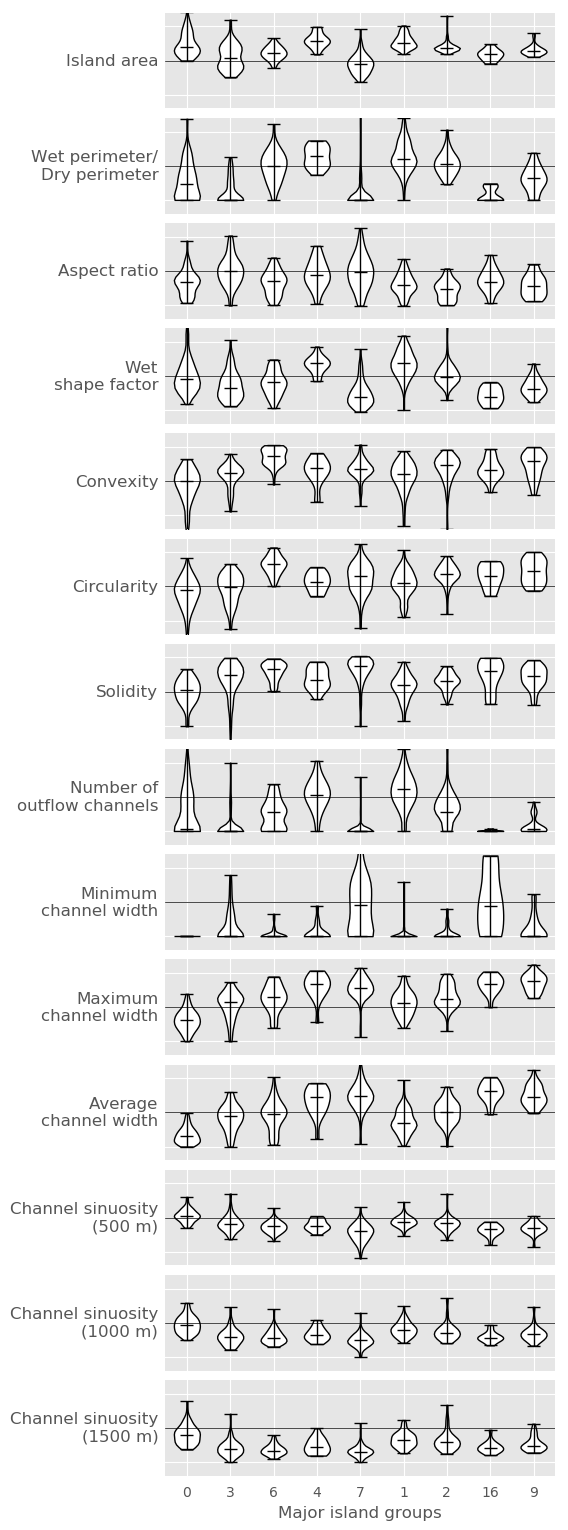

In [134]:
import matplotlib.gridspec as gridspec

'''
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

The final classification scheme uses
threshold = 0.8
distance = 0.3

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
'''

cmap = plt.cm.gray
norm = mpl.colors.Normalize(vmin=-0.8, vmax=0.1)

r = 0.3
cols = [i for i in data.columns if i != 'class']

data['class'] = new_classes2_all[str(r)]


# islands_of_interest = [252, 624, 694, 808, 1027, 1005, 1000, 1053, 210, 193]

# ioi_classes_all = [data.loc[i,'class'] for i in islands_of_interest]
# ioi_classes = np.unique(ioi_classes_all)


ioi_classes = [0,3,6,4,7,1,2,16,9]
# fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(6, 19))

vals_all = []


plt.figure(figsize = (6, 19))
gs1 = gridspec.GridSpec(len(cols),1)
gs1.update(wspace=0.075, hspace=0.1, left=0.3, right=0.95) # set the spacing between axes. 

axes = [plt.subplot(gs1[i]) for i in range(len(cols))]

for nn,col in enumerate(cols):

    axes[nn].set_facecolor('0.9')

    vals = [list(data.loc[data['class'] == i, col]- 0.5) for i in ioi_classes]
    vals_med = [np.median(i) for i in vals]

    vals_all.append(vals_med)

    parts = axes[nn].violinplot(vals, range(len(ioi_classes)), points=20, widths=0.6,
                          showmeans=False, showextrema=True, showmedians=True,);

    for n,pc in enumerate(parts['bodies']):
        pc.set_facecolor('w')#cmap(norm(vals_med[n])))
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        pc.set_linewidth(1)

    for c in parts.keys():
        if c != 'bodies':
            vp = parts[c]
            vp.set_edgecolor('black')
            vp.set_linewidth(1)


#     for ioi_n, ioi in enumerate(islands_of_interest):

#         xloc = ioi_classes[nn]
#         ioi_val = data.loc[ioi,col] - 0.5

#         axes[nn].plot(xloc, ioi_val, '.', markeredgecolor = 'w', markerfacecolor = 'k' , markersize = 15)
#         axes[nn].text(xloc+0.1, ioi_val, str(ioi))

    axes[nn].axhline(0, color='black', lw = 0.5)
#     axes[nn].plot(line_range, np.ones_like(line_range) * 0.5, 'k--', lw = 1, zorder = 1)
    axes[nn].set_ylim(-0.7,0.7)
    axes[nn].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    axes[nn].set_xticks(np.unique(data['class']))
#     axes[nn].grid(color='0.5', linestyle='--', linewidth=1)
#     axes[nn].axis(False);
    axes[nn].spines['top'].set_visible(False)
    axes[nn].spines['right'].set_visible(False)
    axes[nn].spines['bottom'].set_visible(False)
    axes[nn].spines['left'].set_visible(False)

    h = axes[nn].set_ylabel(cols_clean[nn], labelpad = 5, horizontalalignment = 'right', verticalalignment = 'center')
    h.set_rotation(0)
    axes[nn].set_xlim(-0.5,len(ioi_classes) - 0.5);#data['class'].max() + 0.5)

axes[nn].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
axes[nn].set_xticks(np.arange(len(ioi_classes)))
axes[nn].set_xticklabels(ioi_classes);
axes[nn].set_xlabel('Major island groups')


fig.subplots_adjust(left=0.3)
fig.subplots_adjust(right=0.95)

plt.savefig('_figs/violin_major_groups.png')
plt.show()

In [37]:
pd.to_pickle(data, '_output/FINAL_CLASSIFICATION_DATA.p')

In [38]:

field['class'] = new_classes2_all['0.3']

field_type = {}
for k in field.keys():
    field_type[k] = ogr.OFTReal

create_shapefile_from_shapely_multi(islands,
                                    '_output/FINAL_CLASSES.shp',
                                    fields = field,
                                    field_type = field_type)

In [153]:
valuecount = new_classes2_all['0.3'].value_counts()

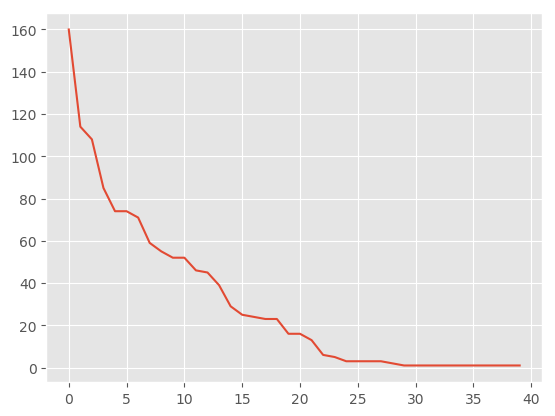

In [161]:
plt.plot(range(len(valuecount.values)), valuecount.values)
plt.show()

In [162]:
valuecount

10    160
1     114
7     108
3      85
0      74
12     74
33     71
2      59
6      55
14     52
8      52
30     46
11     45
19     39
9      29
25     25
17     24
32     23
27     23
16     16
4      16
15     13
13      6
31      5
20      3
35      3
38      3
23      3
22      2
34      1
37      1
36      1
5       1
29      1
28      1
24      1
26      1
21      1
18      1
39      1
Name: 0.3, dtype: int64